In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("fetal_health.csv")
defaulter_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (2126, 22)


In [5]:
print("Target variable frequency distribution : \n", defaulter_df["fetal_health"].value_counts())

Target variable frequency distribution : 
 1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


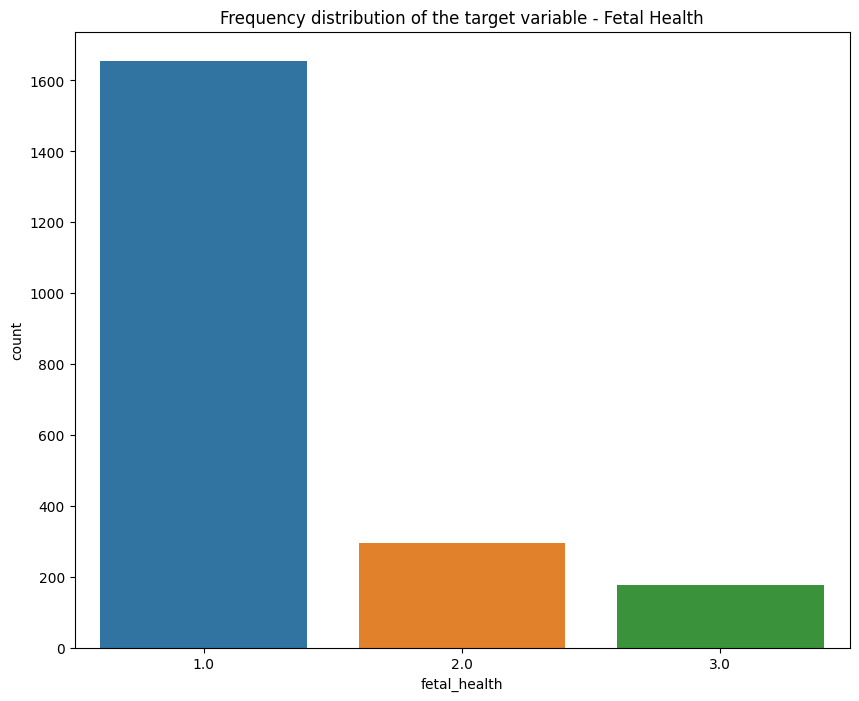

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(data=defaulter_df, x="fetal_health")
plt.title("Frequency distribution of the target variable - Fetal Health")
plt.show()

In [7]:
X = defaulter_df[["light_decelerations", "severe_decelerations"]]
y = defaulter_df["fetal_health"]

# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  1700
Size of test data :  426


# Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed


array([[0.13333333, 0.        ],
       [0.53333333, 0.        ],
       [0.33333333, 0.        ],
       [0.        , 0.        ],
       [0.46666667, 0.        ],
       [0.        , 0.        ],
       [0.33333333, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.06666667, 0.        ],
       [0.06666667, 0.        ],
       [0.        , 0.        ],
       [0.26666667, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.6       , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.33333333, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.2       , 0.        ],
       [0.        , 0.        ],
       [0.2       , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.

In [13]:
X_train["light_decelerations_normalized"] = train_transformed[:,0]
X_train["severe_decelerations_normalized"] = train_transformed[:,1]
X_train.head()

,light_decelerations,severe_decelerations,light_decelerations_normalized,severe_decelerations_normalized
1233,0.000,0.0,0.000000,0.0
480,0.000,0.0,0.000000,0.0
1111,0.001,0.0,0.066667,0.0
1303,0.002,0.0,0.133333,0.0
861,0.000,0.0,0.000000,0.0


In [14]:
X_test["light_decelerations_normalized"] = transformed[:,0]
X_test["severe_decelerations_normalized"] = transformed[:,1]
X_test.head()

,light_decelerations,severe_decelerations,light_decelerations_normalized,severe_decelerations_normalized
282,0.002,0.0,0.133333,0.0
1999,0.008,0.0,0.533333,0.0
1709,0.005,0.0,0.333333,0.0
988,0.000,0.0,0.000000,0.0
2018,0.007,0.0,0.466667,0.0


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["light_decelerations", "severe_decelerations"]], y_train)
predictions = knn.predict(X_test[["light_decelerations", "severe_decelerations"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7746478873239436

In [17]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["light_decelerations_normalized","severe_decelerations_normalized"]], y_train)
predictions = knn.predict(X_test[["light_decelerations_normalized","severe_decelerations_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7769953051643192

In [18]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [19]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1.0","2.0","3.0"], index = ["1.0","2.0","3.0"])

,1.0,2.0,3.0
1.0,331,0,2
2.0,64,0,0
3.0,29,0,0


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.78      0.99      0.87       333
         2.0       0.00      0.00      0.00        64
         3.0       0.00      0.00      0.00        29

    accuracy                           0.78       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.61      0.78      0.68       426



# Sampling Techniques to handle imbalanced Dataset

## 1. UnderSampling (downsampling)

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
print("Before undersampling: \n", y_train.value_counts())

Before undersampling: 
 1.0    1322
2.0     231
3.0     147
Name: fetal_health, dtype: int64


In [23]:
under_sampling = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_train_under, y_train_under  = under_sampling.fit_resample(X_train, y_train)

In [24]:
print("After undersampling: \n", y_train_under.value_counts())

After undersampling: 
 1.0    147
2.0    147
3.0    147
Name: fetal_health, dtype: int64


In [25]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_under[["light_decelerations_normalized","severe_decelerations_normalized"]], y_train_under)
predictions = knn.predict(X_test[["light_decelerations_normalized","severe_decelerations_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.6924882629107981

In [26]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1.0","2.0","3.0"], index = ["1.0","2.0","3.0"])

,1.0,2.0,3.0
1.0,285,37,11
2.0,59,5,0
3.0,20,4,5


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.78      0.86      0.82       333
         2.0       0.11      0.08      0.09        64
         3.0       0.31      0.17      0.22        29

    accuracy                           0.69       426
   macro avg       0.40      0.37      0.38       426
weighted avg       0.65      0.69      0.67       426



## 2. OverSampling(Up Sampling)

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
print("Before oversampling: \n", y_train.value_counts())

Before oversampling: 
 1.0    1322
2.0     231
3.0     147
Name: fetal_health, dtype: int64


In [31]:
over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over  = over_sampling.fit_resample(X_train, y_train)

In [32]:
print("After oversampling: \n", y_train_over.value_counts())

After oversampling: 
 1.0    1322
2.0    1322
3.0    1322
Name: fetal_health, dtype: int64


In [33]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_over[["light_decelerations_normalized","severe_decelerations_normalized"]], y_train_over)
predictions = knn.predict(X_test[["light_decelerations_normalized","severe_decelerations_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7746478873239436

In [34]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1.0","2.0","3.0"], index = ["1.0","2.0","3.0"])

,1.0,2.0,3.0
1.0,330,0,3
2.0,64,0,0
3.0,29,0,0


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.78      0.99      0.87       333
         2.0       0.00      0.00      0.00        64
         3.0       0.00      0.00      0.00        29

    accuracy                           0.77       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.61      0.77      0.68       426



## 3. SMOTE (Synthetic Minority Oversampling Technique)# 

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
print("Before SMOTE: \n", y_train.value_counts())

Before SMOTE: 
 1.0    1322
2.0     231
3.0     147
Name: fetal_health, dtype: int64


In [38]:
smote = SMOTE()
X_train_smote, y_train_smote  = smote.fit_resample(X_train, y_train)

In [39]:
print("After SMOTE: \n", y_train_smote.value_counts())

After SMOTE: 
 1.0    1322
2.0    1322
3.0    1322
Name: fetal_health, dtype: int64


In [40]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_smote[["light_decelerations_normalized","severe_decelerations_normalized"]], y_train_smote)
predictions = knn.predict(X_test[["light_decelerations_normalized","severe_decelerations_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7746478873239436

In [41]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1.0","2.0","3.0"], index = ["1.0","2.0","3.0"])

,1.0,2.0,3.0
1.0,329,0,4
2.0,64,0,0
3.0,28,0,1


In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.78      0.99      0.87       333
         2.0       0.00      0.00      0.00        64
         3.0       0.20      0.03      0.06        29

    accuracy                           0.77       426
   macro avg       0.33      0.34      0.31       426
weighted avg       0.62      0.77      0.69       426

